In [ ]:
'''
【项目06】  多场景下的图表可视化表达

课程数据：
2016年奥运运动员数据，数据格式为xlsx，分3个sheet

1、分男女分别分析运动员的身高分布，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 制作分布密度图
② 计算出男女平均身高，并绘制辅助线表示
提示：
① 可视化制图方法 → sns.distplot()
② 辅助线制图方法 → plt.axvline()
③ 分男女分别筛选数据并制作图表
④ 不需要创建函数

2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 针对不同指标，绘制面积堆叠图
② TOP8的运动员，绘制雷达图表示
提示：
① 四个指标评判运动员身材，并加权平均
   a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高
   b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高
   c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高
   d. 年龄 指数 → 年龄越小分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = (n1 + n2 + n3 + n4)/4
② 制作堆叠面积图，data.plot.area()
③ 雷达图需要构建子图 + for循环遍历得到

3、根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表，数据为“奥运运动员数据.xlsx，sheet → 运动员CP热度”
要求：
① 用python计算出综合热度指标
② 用Gephi绘制关系可视化图表
提示：
① 三个指标评判运动员CP综合热度，并加权平均
   a. cp微博数量 → 数量越多分数越高
   b. cp微博话题阅读量 → 阅读量越多分数越高
   c. B站cp视频播放量 → 播放量越大分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = n1*0.5 + n2*0.3 + n3*0.2
② Gephi中布局模式选择“ForceAtlas2”
③ Gephi中通过模块化计算，给关联结果做分组，并且以此分组设定点颜色

'''

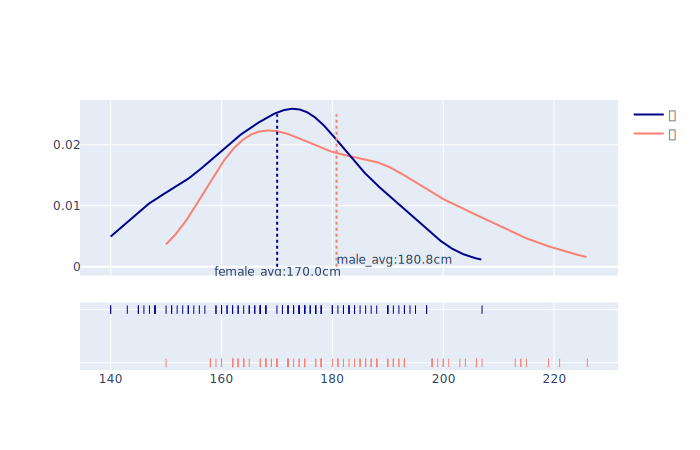

In [210]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.figure_factory import create_distplot
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 
inf = pd.read_excel(r'D:\BaiduNetdiskDownload\项目06多场景下的图表可视化表达\奥运运动员数据.xlsx',sheet_name='运动员信息')
inf_male = inf[inf['gender']=='男']
inf_female = inf[inf['gender']=='女']
inf.isnull().sum()
fig  = create_distplot([list(inf_male['height']),list(inf_female['height'])],['男','女'],histnorm='probability',show_hist=False,colors=['salmon','darkblue'])
fig.add_trace(go.Scatter(x=[inf_female['height'].mean(),inf_female['height'].mean()],y=[0,0.025],mode='lines+text',text=['female_avg:%.1fcm'%inf_female['height'].mean()],\
                         textposition="bottom center",line={'color':'darkblue',"dash": "dot" },showlegend=False))
fig.add_trace(go.Scatter(x=[inf_male['height'].mean(),inf_male['height'].mean()],y=[0,0.025],mode='lines+text',text=['male_avg:%.1fcm'%inf_male['height'].mean()],\
                         textposition="top right",line={'color':'salmon',"dash": "dot" },showlegend=False))
fig.show(renderer='svg')

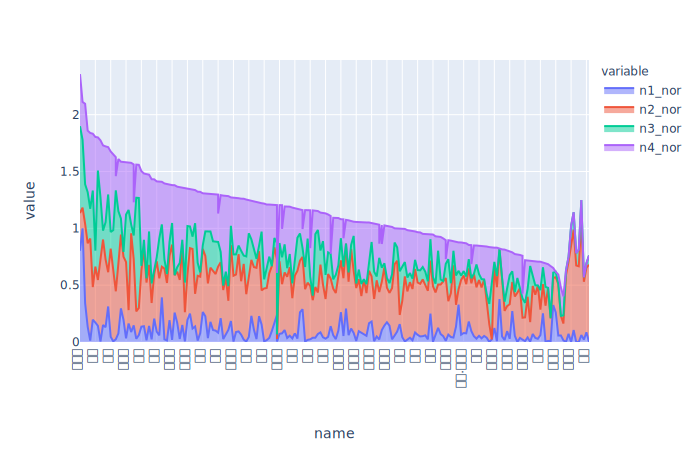

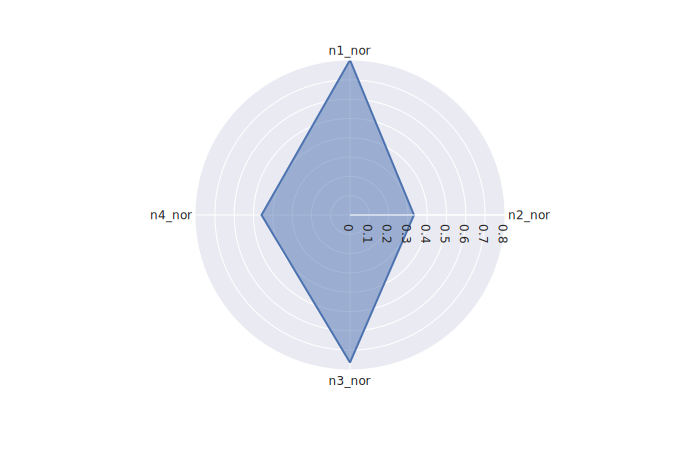

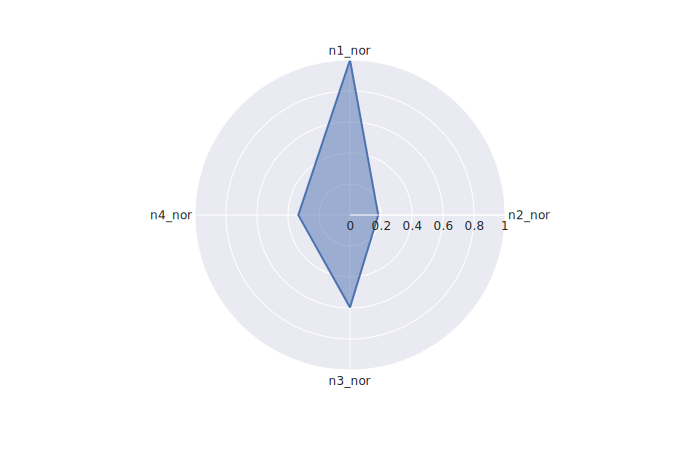

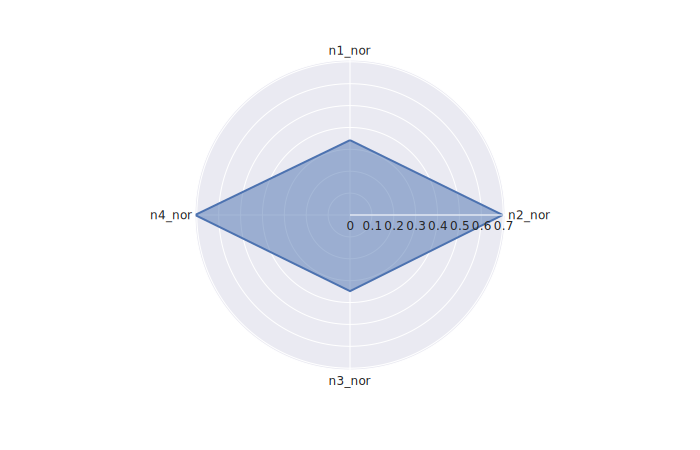

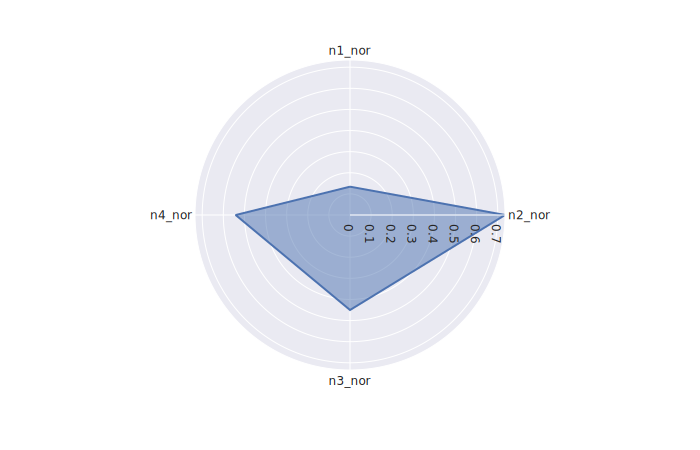

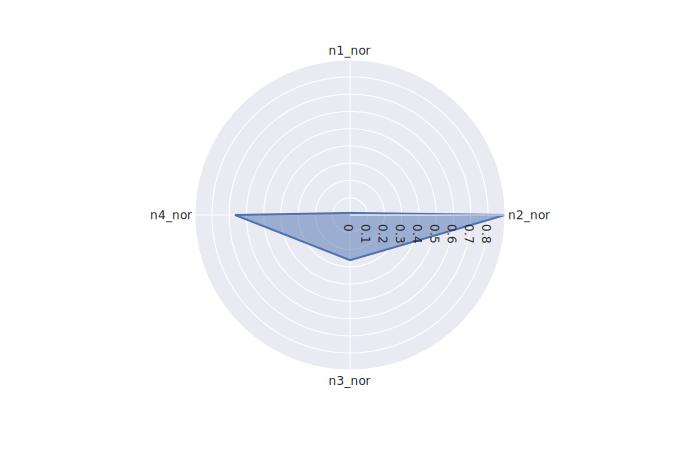

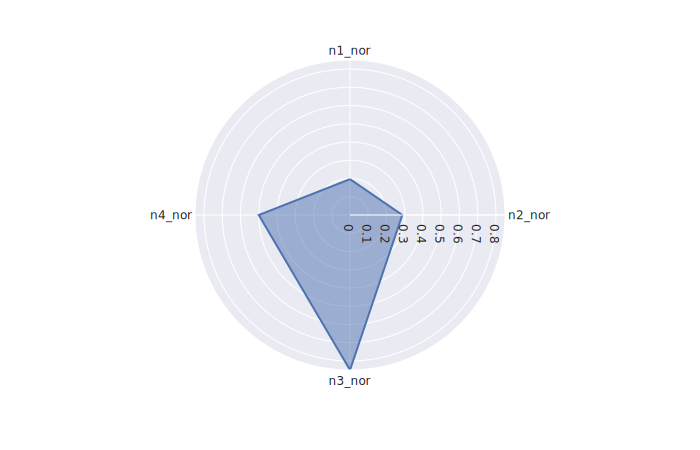

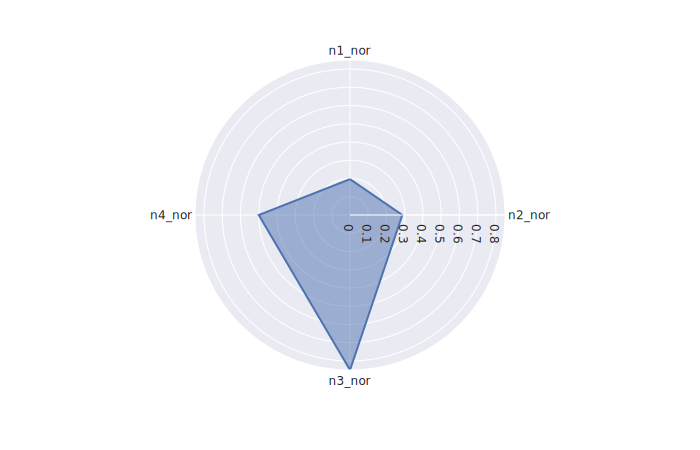

In [212]:
# 2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
# 要求：
# ① 针对不同指标，绘制面积堆叠图
# ② TOP8的运动员，绘制雷达图表示
# 提示：
# ① 四个指标评判运动员身材，并加权平均
#    a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高
#    b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高
#    c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高
#    d. 年龄 指数 → 年龄越小分数越高
#    对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
#    最后评分： finalscore = (n1 + n2 + n3 + n4)/4
# ② 制作堆叠面积图，data.plot.area()
# ③ 雷达图需要构建子图 + for循环遍历得到

inf['n1'] = inf['weight']*10000/(inf['height']**2)
# print(inf['n1'])
inf['n2'] = inf['leg']/inf['height']
inf['n3'] = inf['arm']/inf['height']
inf['n4'] = inf['age']
inf = inf[inf['n2']<0.7]
inf = inf[inf['n3']>0.7]
inf['n1_asess'] = abs(inf['n1']-22)
inf['n3_asess'] = abs(inf['n3']-1)

inf['n1_nor'] = (inf['n1_asess']-inf['n1_asess'].min())/(inf['n1_asess'].max()-inf['n1_asess'].min())
inf['n2_nor'] = (inf['n2']-inf['n2'].min())/(inf['n2'].max()-inf['n2'].min())
inf['n3_nor'] = (inf['n3_asess']-inf['n3_asess'].min())/(inf['n3_asess'].max()-inf['n3_asess'].min())
inf['n4_nor'] = (inf['n4']-inf['n4'].min())/(inf['n4'].max()-inf['n4'].min())
inf['final'] = (inf['n1_nor']+inf['n2_nor']+inf['n3_nor']+inf['n4_nor'])/4
# inf.describe()

inf[['n1','n2','n3','n4']].dropna(inplace=True)
fig_1 = px.area(inf[['name','n1_nor','n2_nor','n3_nor','n4_nor']],x='name',y=['n1_nor','n2_nor','n3_nor','n4_nor'])
fig_1.show(renderer='svg')
inf.sort_values(by='final',inplace=True,ascending=False)
inf.head()
inf_top = inf.iloc[:7,:].reset_index()
inf_top.head()
inf_final = inf_top[['n1_nor','n2_nor','n3_nor','n4_nor']]
for i in range(len(inf_final.index)):
    df =pd.DataFrame(dict(r=inf_final.iloc[i,:].tolist(),theta =['n1_nor','n2_nor','n3_nor','n4_nor']))
    fig_2 = px.line_polar(df,r='r',theta ='theta',line_close=True,template='seaborn')
    fig_2.update_traces(fill='toself')
    fig_2.show(renderer='svg')
